Conclusion
The analysis provided comprehensive insights into the factors affecting house prices over time. The combination of economic indicators, construction costs, and interest rates played significant roles in influencing house prices. The evaluated models, especially the Random Forest, demonstrated strong predictive capabilities, making them valuable tools for forecasting future house prices.


Here are the key points summarizing the analysis and conclusions:

1. Data Collection: 10 features were collected, including economic indicators, construction costs, wages, CPI, shelter costs, rent, interest rates, inflation rates, unemployment rates, energy costs, and the house price index from fred economic
.

2. Data Preparation: The data was merged on the 'Date' column, cleaned, and ensured no missing values were present.

3. Construction Costs and Wages: Both showed a consistent increase over time, indicating inflation and economic growth.

CPI, Shelter Costs, and Rent: These features also showed upward trends, reflecting rising living costs.

4. Interest Rates: Varied significantly over time, reflecting changes in monetary policy and having a negative correlation with house prices.

House Price Index: Displayed a significant upward trend, especially after economic recoveries.

5. Correlation Analysis: High positive correlations were found between construction costs, wages, shelter costs, rent, and house prices. Interest rates had a negative correlation with house prices.

6. Impact on House Pricing: Wages, shelter costs, and construction costs had a strong positive impact on house prices. Higher interest rates generally suppressed house prices due to increased borrowing costs.

7. Model Evaluation: Linear Regression and Random Forest were the best-performing models, with Random Forest providing more accurate predictions.

8. Conclusion: Economic indicators, construction costs, and interest rates significantly influence house prices. The Random Forest model demonstrated strong predictive capabilities for forecasting future house prices.



In [1]:
#Importing all dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
df1=pd.read_csv("(construction work).csv")
df2=pd.read_csv("AHETPI(wages).csv")
df3=pd.read_csv("CORESTICKM159SFRBATL(cpi).csv")
df4=pd.read_csv("CUSR0000SAH1(shelter).csv")
df5=pd.read_csv("CUSR0000SEHA(rent).csv")
df6=pd.read_csv("FEDFUNDS (intrest rate).csv")
df7=pd.read_csv("PCETRIM1M158SFRBDAL(inflation rate).csv")
#df8=pd.read_csv("PCU9241269241262(insurance).csv")
df9=pd.read_csv("UNemployment rate.csv")
df10=pd.read_csv("energy cost.csv")
df11=pd.read_csv("CSUSHPISA (1)(predictive).csv")

In [3]:
df1

,DATE,OPCNRE01ITM661N
0,01-01-1987,41.501490
1,01-02-1987,41.663210
2,01-03-1987,41.723855
3,01-04-1987,41.784500
4,01-05-1987,42.128156
...,...,...
451,01-08-2024,123.900900
452,01-09-2024,122.890700
453,01-10-2024,122.460900
454,01-11-2024,122.430600


DATA VISUALIZATION


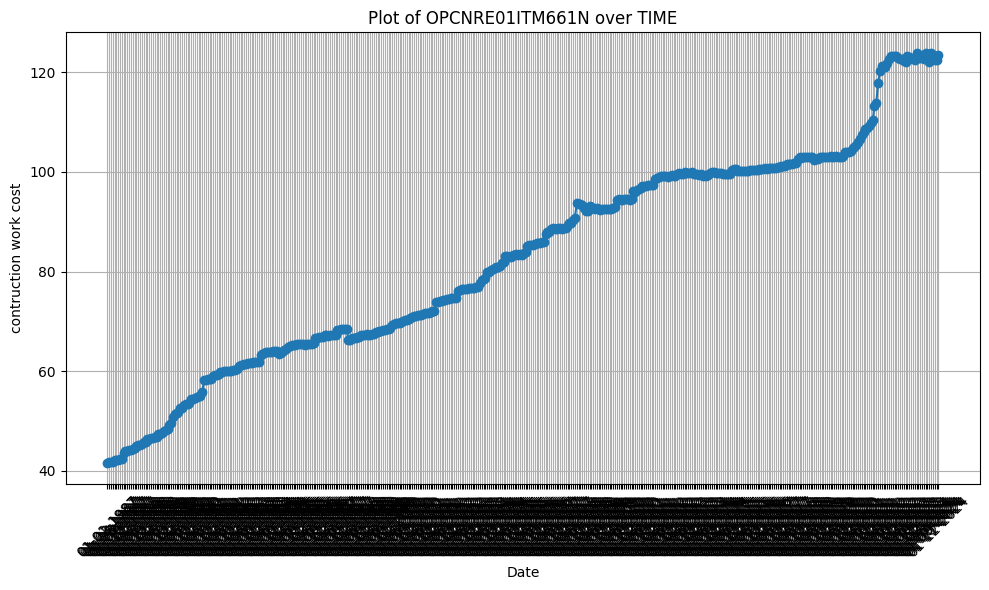

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(df1['DATE'], df1['OPCNRE01ITM661N'], marker='o', linestyle='-')
plt.title('Plot of OPCNRE01ITM661N over TIME')
plt.xlabel('Date')
plt.ylabel('contruction work cost')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

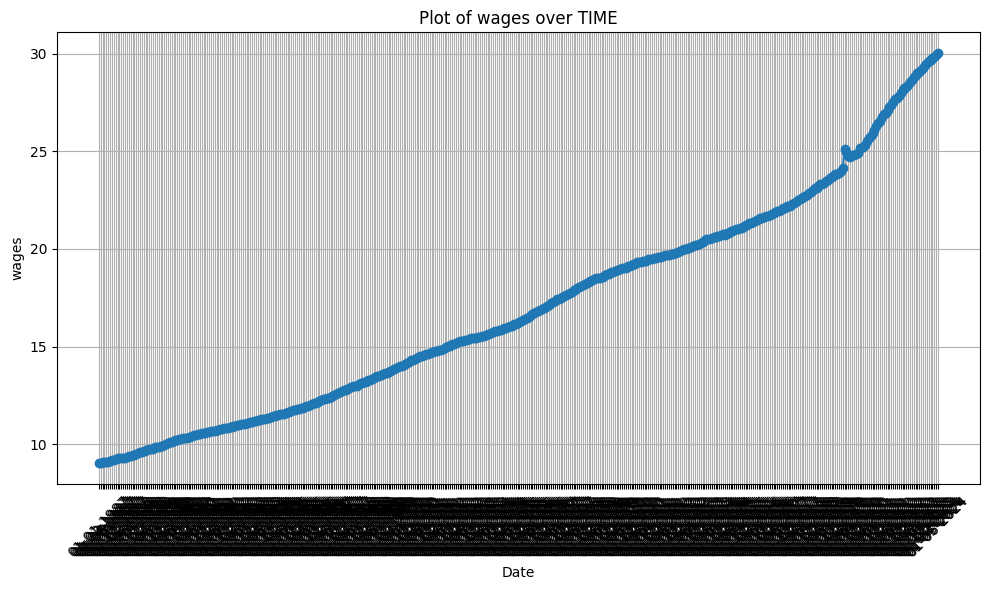

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(df2['DATE'], df2['AHETPI'], marker='o', linestyle='-')
plt.title('Plot of wages over TIME')
plt.xlabel('Date')
plt.ylabel('wages')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

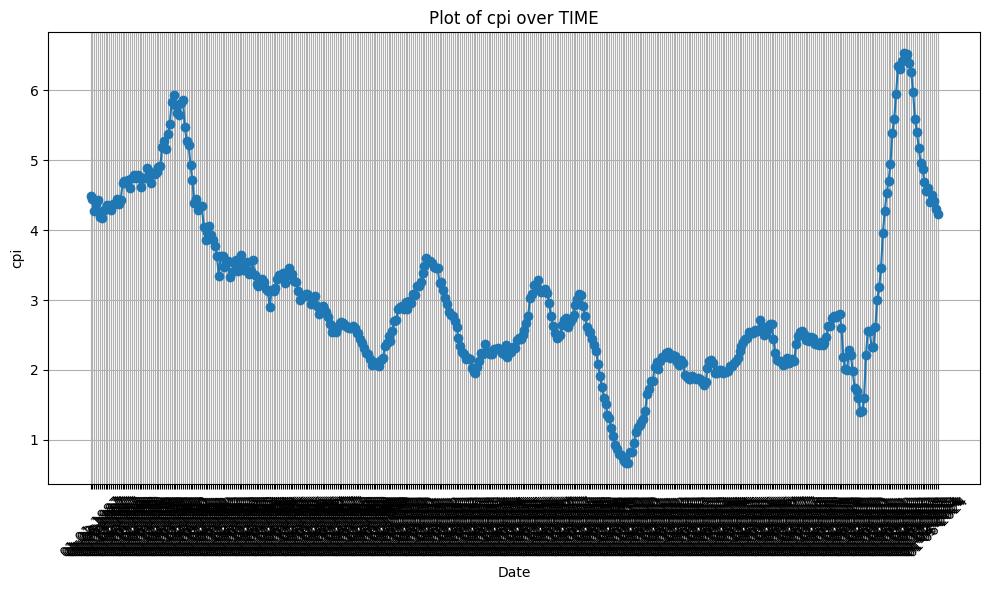

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(df3['DATE'], df3['CORESTICKM159SFRBATL'], marker='o', linestyle='-')
plt.title('Plot of cpi over TIME')
plt.xlabel('Date')
plt.ylabel('cpi')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

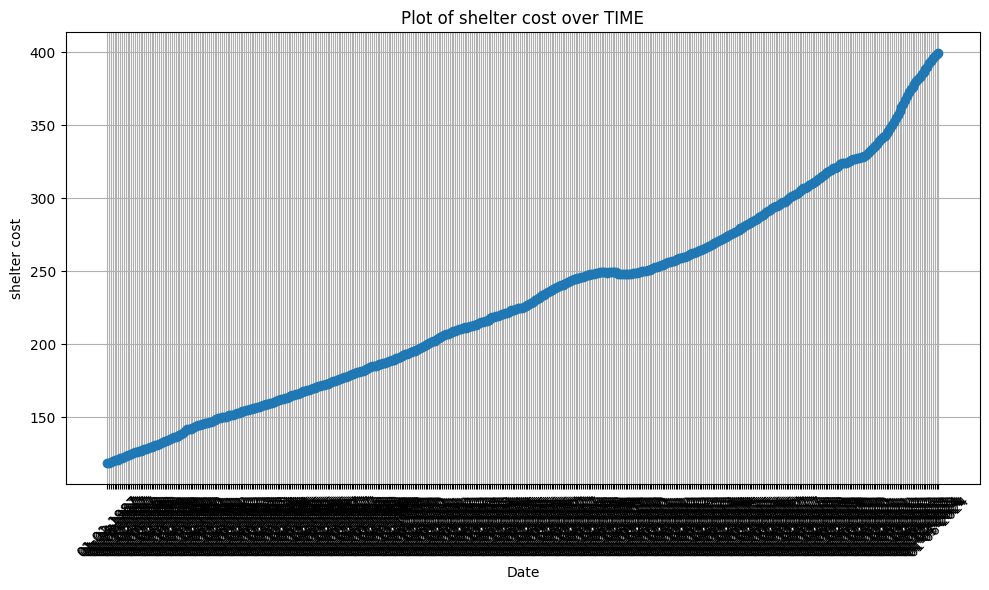

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(df4['DATE'], df4['CUSR0000SAH1'], marker='o', linestyle='-')
plt.title('Plot of shelter cost over TIME')
plt.xlabel('Date')
plt.ylabel('shelter cost')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

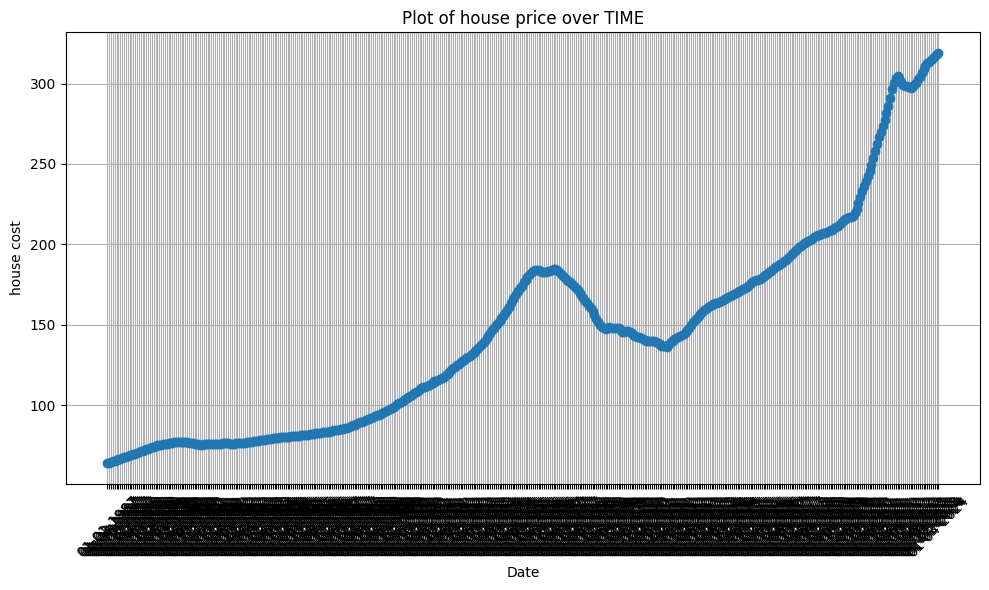

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(df11['DATE'], df11['CSUSHPISA'], marker='o', linestyle='-')
plt.title('Plot of house price over TIME')
plt.xlabel('Date')
plt.ylabel('house cost')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       448 non-null    object 
 1   CSUSHPISA  448 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.1+ KB


In [18]:
df1['DATE'] = pd.to_datetime(df1['DATE'])
df2['DATE'] = pd.to_datetime(df2['DATE'])

In [19]:
df3['DATE'] = pd.to_datetime(df1['DATE'])
df4['DATE'] = pd.to_datetime(df2['DATE'])
df5['DATE'] = pd.to_datetime(df1['DATE'])
df6['DATE'] = pd.to_datetime(df2['DATE'])
df7['DATE'] = pd.to_datetime(df1['DATE'])
df9['DATE'] = pd.to_datetime(df2['DATE'])
df10['DATE'] = pd.to_datetime(df1['DATE'])
df11['DATE'] = pd.to_datetime(df2['DATE'])

In [20]:
dfs = [df1, df2, df3, df4, df5, df6, df7, df9, df10, df11]

# Perform the merge on the 'date' column
merged_df = dfs[0]
for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df, on='DATE', how='right')

# Save or view the merged DataFrame
print(merged_df.head())
# merged_df.to_csv("merged_data.csv", index=False)

        DATE  OPCNRE01ITM661N  AHETPI  CORESTICKM159SFRBATL  CUSR0000SAH1  \
0 1987-01-01        41.501490    9.02              4.492110         118.6   
1 1987-01-02        41.663210    9.05              4.451732         119.1   
2 1987-01-03        41.723855    9.07              4.276018         119.5   
3 1987-01-04        41.784500    9.08              4.371204         120.3   
4 1987-01-05        42.128156    9.11              4.429512         120.7   

   CUSR0000SEHA  FEDFUNDS  PCETRIM1M158SFRBDAL  Unnamed: 0  APU000074714  \
0         121.2      6.43                 4.90  01-01-1987         0.862   
1         121.6      6.10                 3.37  01-02-1987         0.905   
2         122.0      6.13                 3.99  01-03-1987         0.912   
3         122.2      6.37                 5.01  01-04-1987         0.934   
4         122.5      6.85                 3.34  01-05-1987         0.941   

   CSUSHPISA  
0     63.965  
1     64.423  
2     64.735  
3     65.131  
4    

In [21]:
new_column_names = {
    'DATE': 'Date',
    'OPCNRE01ITM661N': 'Construction_Work',
    'AHETPI': 'Wages',
    'CORESTICKM159SFRBATL': 'CPI',
    'CUSR0000SAH1': 'Shelter_Index',
    'CUSR0000SEHA': 'Rent',
    'FEDFUNDS': 'Interest_Rate',
    'PCETRIM1M158SFRBDAL': 'Inflation_Rate',
    'Unnamed: 0': 'Unused_Column',
    'APU000074714': 'energy_cost',
    'CSUSHPISA': 'Predictive_Index'
}

# Rename columns in merged_df
merged_df.rename(columns=new_column_names, inplace=True)

print(merged_df.head())

        Date  Construction_Work  Wages       CPI  Shelter_Index   Rent  \
0 1987-01-01          41.501490   9.02  4.492110          118.6  121.2   
1 1987-01-02          41.663210   9.05  4.451732          119.1  121.6   
2 1987-01-03          41.723855   9.07  4.276018          119.5  122.0   
3 1987-01-04          41.784500   9.08  4.371204          120.3  122.2   
4 1987-01-05          42.128156   9.11  4.429512          120.7  122.5   

   Interest_Rate  Inflation_Rate Unused_Column  energy_cost  Predictive_Index  
0           6.43            4.90    01-01-1987        0.862            63.965  
1           6.10            3.37    01-02-1987        0.905            64.423  
2           6.13            3.99    01-03-1987        0.912            64.735  
3           6.37            5.01    01-04-1987        0.934            65.131  
4           6.85            3.34    01-05-1987        0.941            65.563  


In [22]:
df = merged_df

In [23]:
df.head()

,Date,Construction_Work,Wages,CPI,Shelter_Index,Rent,Interest_Rate,Inflation_Rate,Unused_Column,energy_cost,Predictive_Index
0,1987-01-01,41.501490,9.02,4.492110,118.6,121.2,6.43,4.90,01-01-1987,0.862,63.965
1,1987-01-02,41.663210,9.05,4.451732,119.1,121.6,6.10,3.37,01-02-1987,0.905,64.423
2,1987-01-03,41.723855,9.07,4.276018,119.5,122.0,6.13,3.99,01-03-1987,0.912,64.735
3,1987-01-04,41.784500,9.08,4.371204,120.3,122.2,6.37,5.01,01-04-1987,0.934,65.131
4,1987-01-05,42.128156,9.11,4.429512,120.7,122.5,6.85,3.34,01-05-1987,0.941,65.563


In [24]:
df.shape

(448, 11)

In [25]:
df = df.drop(columns=['Unused_Column'])

In [26]:
df.describe()

,Date,Construction_Work,Wages,CPI,Shelter_Index,Rent,Interest_Rate,Inflation_Rate,energy_cost,Predictive_Index
count,448,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000
mean,2005-03-09 01:04:17.142857088,82.190029,16.960067,3.005803,229.087040,229.320496,3.201339,2.390134,2.112382,144.621897
min,1987-01-01 00:00:00,41.501490,9.020000,0.663868,118.600000,121.200000,0.050000,0.300000,0.862000,63.965000
25%,1996-01-04 18:00:00,65.515858,11.965000,2.224757,170.275000,161.200000,0.367500,1.747500,1.158750,82.562500
50%,2005-01-08 12:00:00,83.360840,16.180000,2.672741,224.750000,218.400000,3.000000,2.170000,2.009500,141.861500
75%,2014-04-10 12:00:00,99.824956,20.777500,3.470926,274.188250,280.593000,5.330000,2.830000,2.860500,180.401500
max,2024-01-04 00:00:00,123.786500,29.830000,6.538167,397.268000,416.507000,9.850000,6.940000,5.058000,319.048000
std,NaN,21.079452,5.485824,1.175057,69.127085,76.204298,2.670215,1.044098,0.982098,64.425989


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               448 non-null    datetime64[ns]
 1   Construction_Work  448 non-null    float64       
 2   Wages              448 non-null    float64       
 3   CPI                448 non-null    float64       
 4   Shelter_Index      448 non-null    float64       
 5   Rent               448 non-null    float64       
 6   Interest_Rate      448 non-null    float64       
 7   Inflation_Rate     448 non-null    float64       
 8   energy_cost        448 non-null    float64       
 9   Predictive_Index   448 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 35.1 KB


In [28]:
df.isnull().sum()

Date                 0
Construction_Work    0
Wages                0
CPI                  0
Shelter_Index        0
Rent                 0
Interest_Rate        0
Inflation_Rate       0
energy_cost          0
Predictive_Index     0
dtype: int64

In [29]:
float_columns = df.select_dtypes(include=['float64'])

# Compute the correlation matrix
correlation_matrix = float_columns.corr()


print(correlation_matrix)


                   Construction_Work     Wages       CPI  Shelter_Index  \
Construction_Work           1.000000  0.977240 -0.313097       0.978682   
Wages                       0.977240  1.000000 -0.212963       0.997307   
CPI                        -0.313097 -0.212963  1.000000      -0.224277   
Shelter_Index               0.978682  0.997307 -0.224277       1.000000   
Rent                        0.969461  0.997877 -0.190865       0.997506   
Interest_Rate              -0.703876 -0.632210  0.655764      -0.626962   
Inflation_Rate             -0.197583 -0.098815  0.696678      -0.119833   
energy_cost                 0.877940  0.833292 -0.236320       0.818039   
Predictive_Index            0.917302  0.956846 -0.050850       0.959529   

                       Rent  Interest_Rate  Inflation_Rate  energy_cost  \
Construction_Work  0.969461      -0.703876       -0.197583     0.877940   
Wages              0.997877      -0.632210       -0.098815     0.833292   
CPI               -0.190

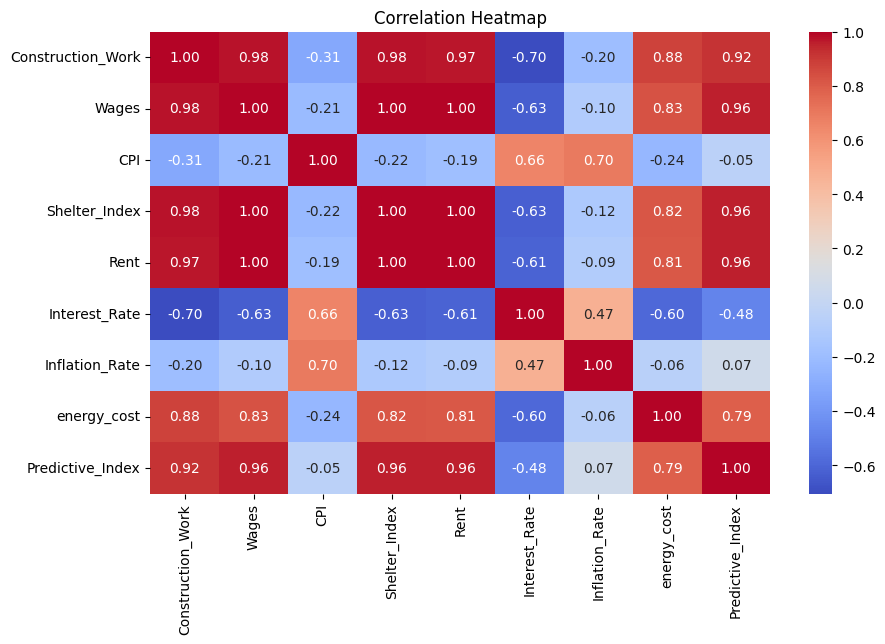

In [30]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Data Cleaning and Data preprocessing


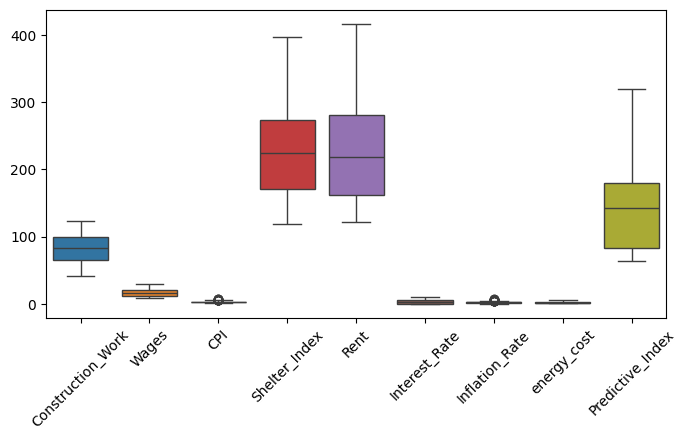

In [31]:
# Boxplot for each feature
plt.figure(figsize=(8, 4))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [32]:
Q1 = float_columns.quantile(0.25)
Q3 = float_columns.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = pd.DataFrame()
for column in float_columns.columns:
    column_outliers = (float_columns[column] < (Q1[column] - 1.5 * IQR[column])) | (float_columns[column] > (Q3[column] + 1.5 * IQR[column]))
    outliers[column] = column_outliers

# Check if there are any outliers in each row
outlier_rows = outliers.any(axis=1)

# Display the rows with outliers
outlier_rows
df_no_outliers = df[~outliers]

print("Summary after removing outliers:")
print(df_no_outliers.describe())

Summary after removing outliers:
      Date  Construction_Work       Wages         CPI  Shelter_Index  \
count    0         448.000000  448.000000  424.000000     448.000000   
mean   NaT          82.190029   16.960067    2.840721     229.087040   
min    NaT          41.501490    9.020000    0.663868     118.600000   
25%    NaT          65.515858   11.965000    2.191599     170.275000   
50%    NaT          83.360840   16.180000    2.620335     224.750000   
75%    NaT          99.824956   20.777500    3.349853     274.188250   
max    NaT         123.786500   29.830000    5.276985     397.268000   
std    NaN          21.079452    5.485824    0.969899      69.127085   

             Rent  Interest_Rate  Inflation_Rate  energy_cost  \
count  448.000000     448.000000      424.000000   448.000000   
mean   229.320496       3.201339        2.229316     2.112382   
min    121.200000       0.050000        0.300000     0.862000   
25%    161.200000       0.367500        1.720000     1.158

In [ ]:
df.shape

(448, 10)

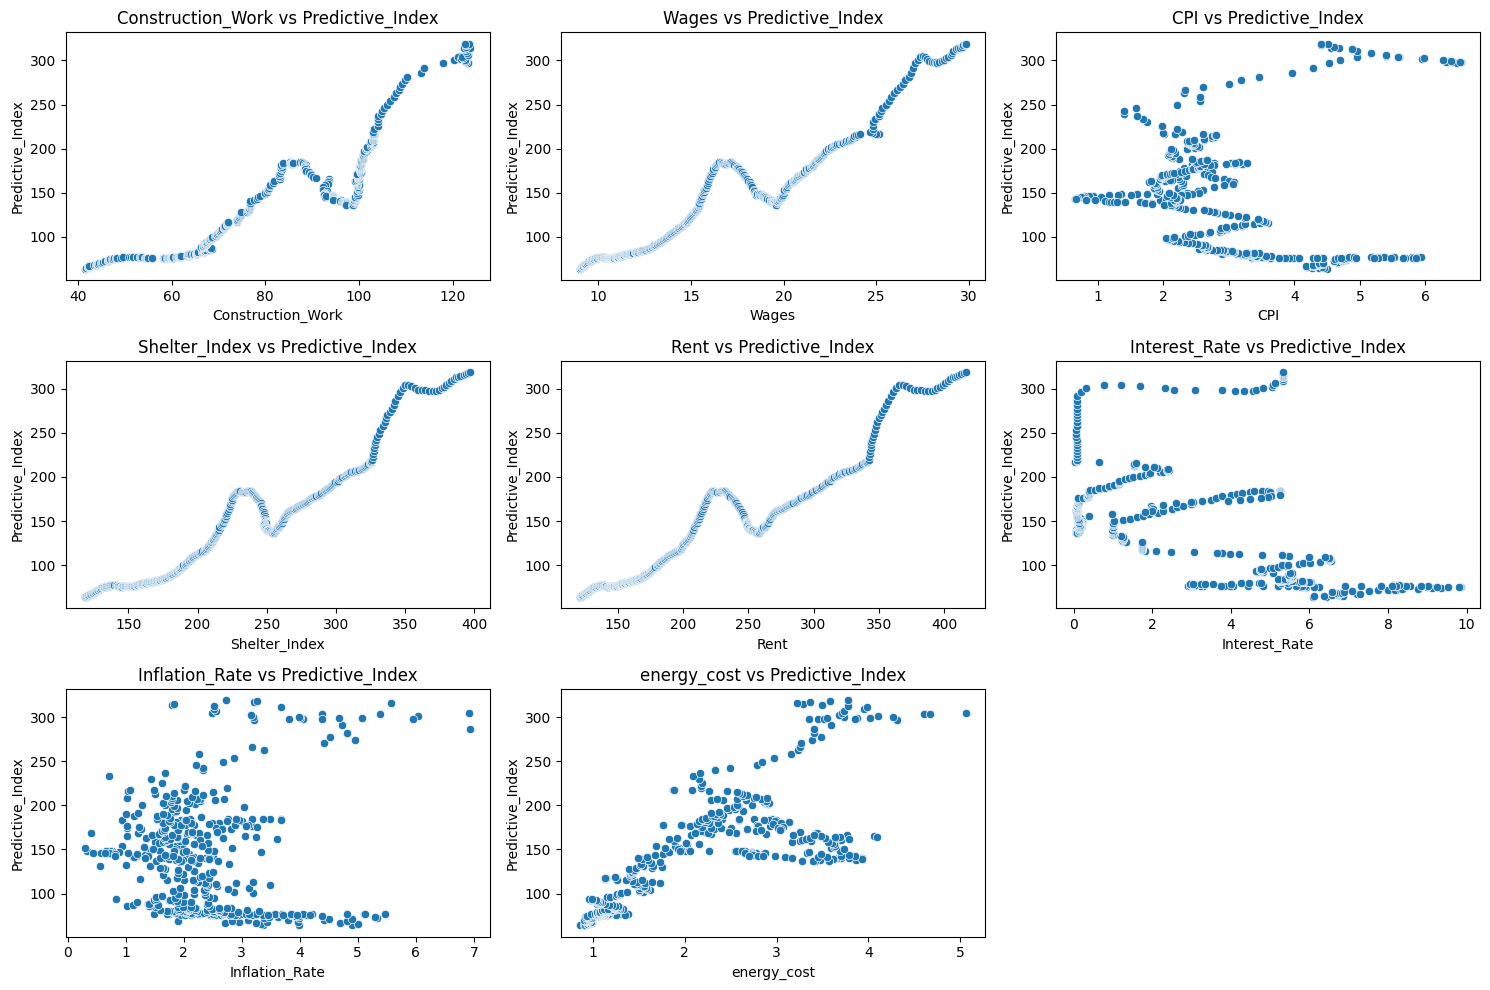

In [ ]:
columns_to_plot = ['Construction_Work', 'Wages', 'CPI', 'Shelter_Index', 'Rent', 'Interest_Rate', 'Inflation_Rate',  'energy_cost']

# Create scatter plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df, x=column, y='Predictive_Index')
    plt.title(f'{column} vs Predictive_Index')
    plt.xlabel(column)
    plt.ylabel('Predictive_Index')

plt.tight_layout()
plt.show()

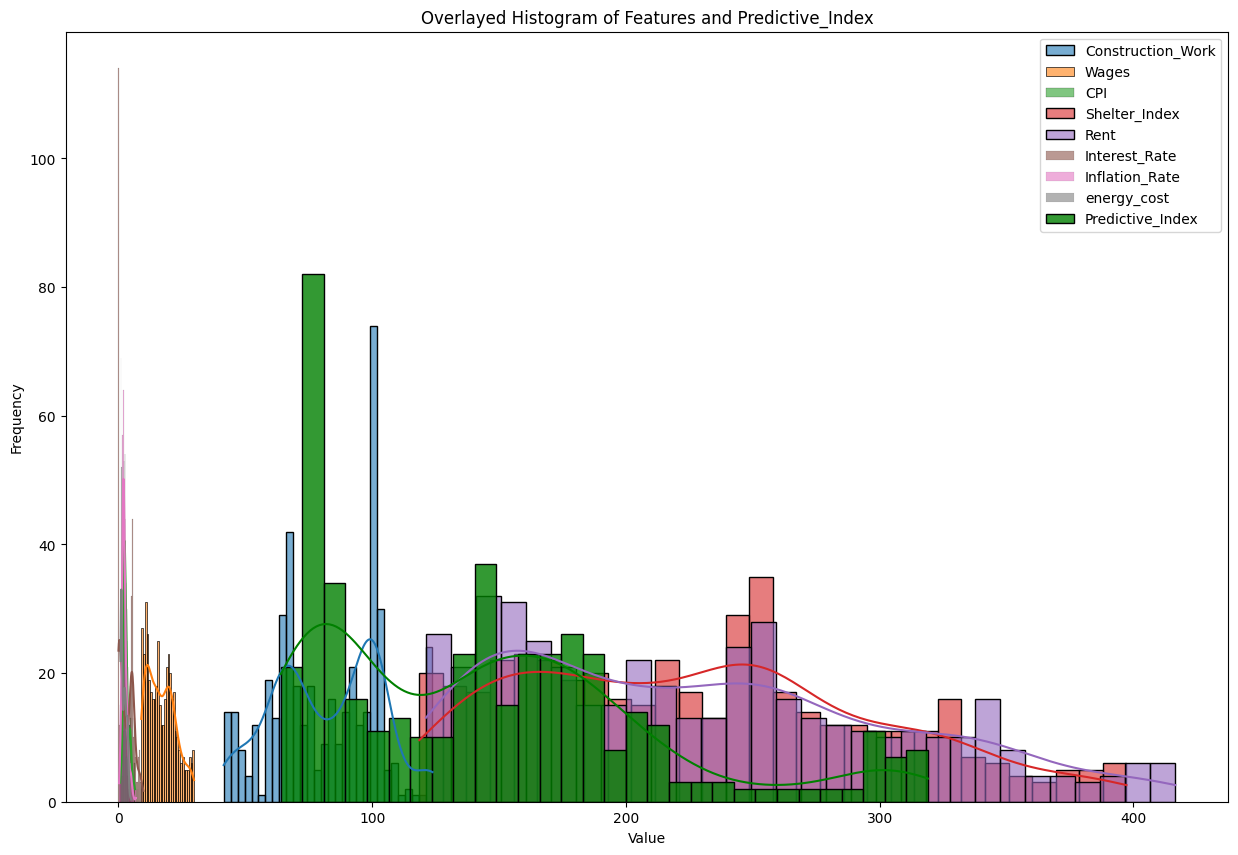

In [ ]:
plt.figure(figsize=(15, 10))
for column in columns_to_plot:
    sns.histplot(df[column], bins=30, kde=True, label=column, alpha=0.6)
sns.histplot(df['Predictive_Index'], bins=30, kde=True, color='green', label='Predictive_Index', alpha=0.8)
plt.title('Overlayed Histogram of Features and Predictive_Index')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

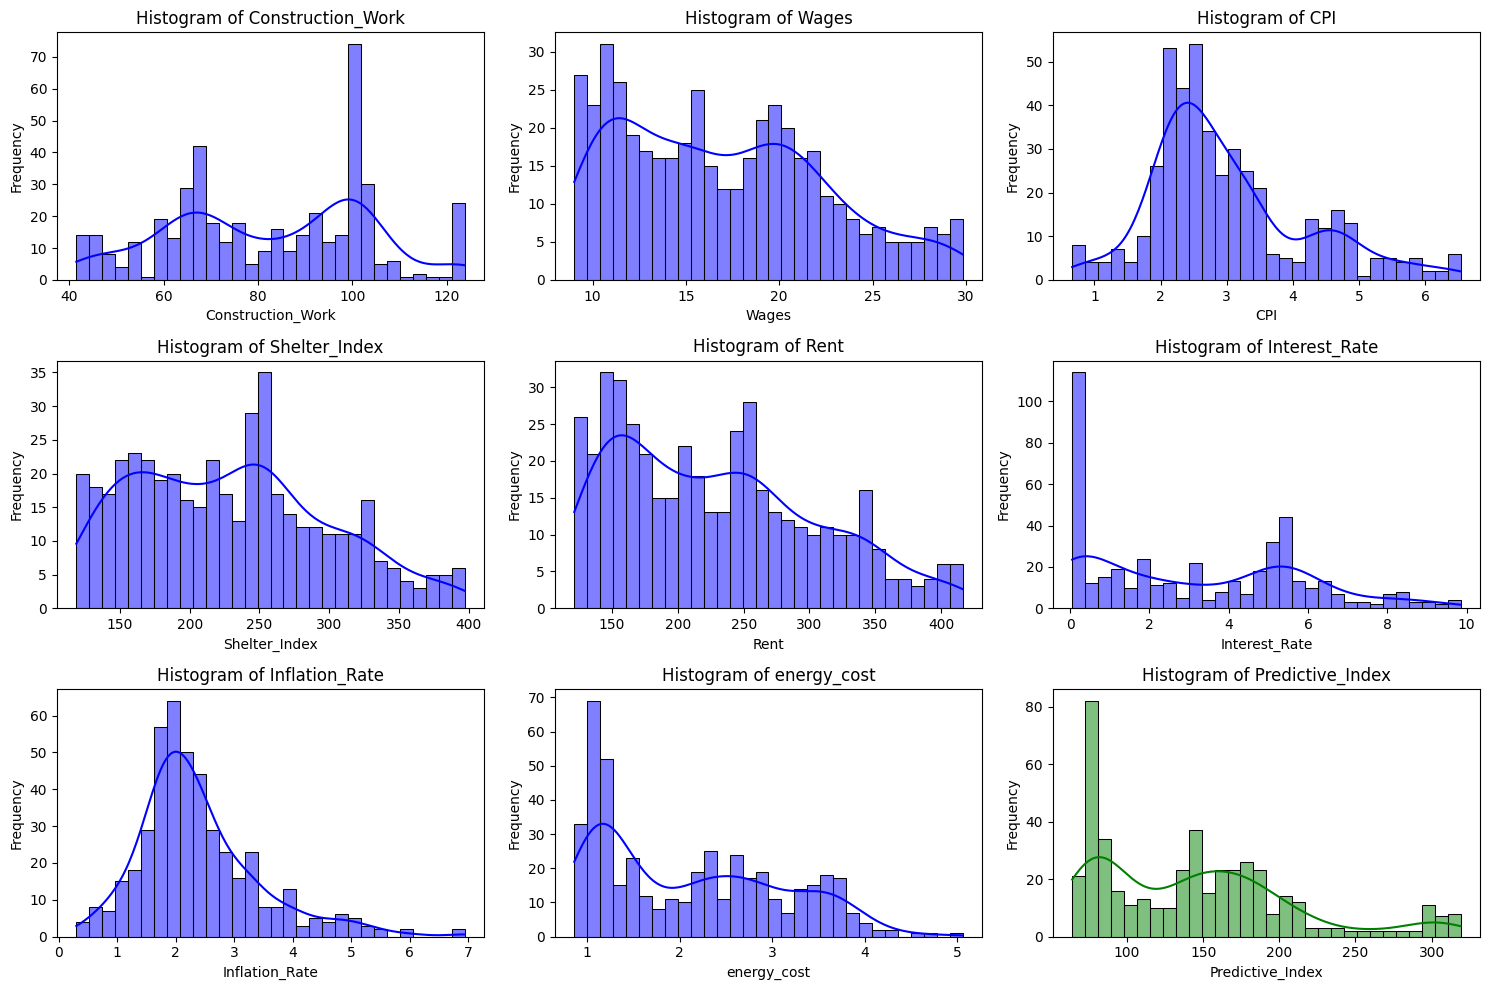

In [ ]:


# Create a figure with subplots
plt.figure(figsize=(15, 10))

# Plot histogram for each column and Predictive_Index
for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Add a histogram for Predictive_Index
plt.subplot(3, 3, len(columns_to_plot) + 1)
sns.histplot(df['Predictive_Index'], bins=30, kde=True, color='green')
plt.title('Histogram of Predictive_Index')
plt.xlabel('Predictive_Index')
plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

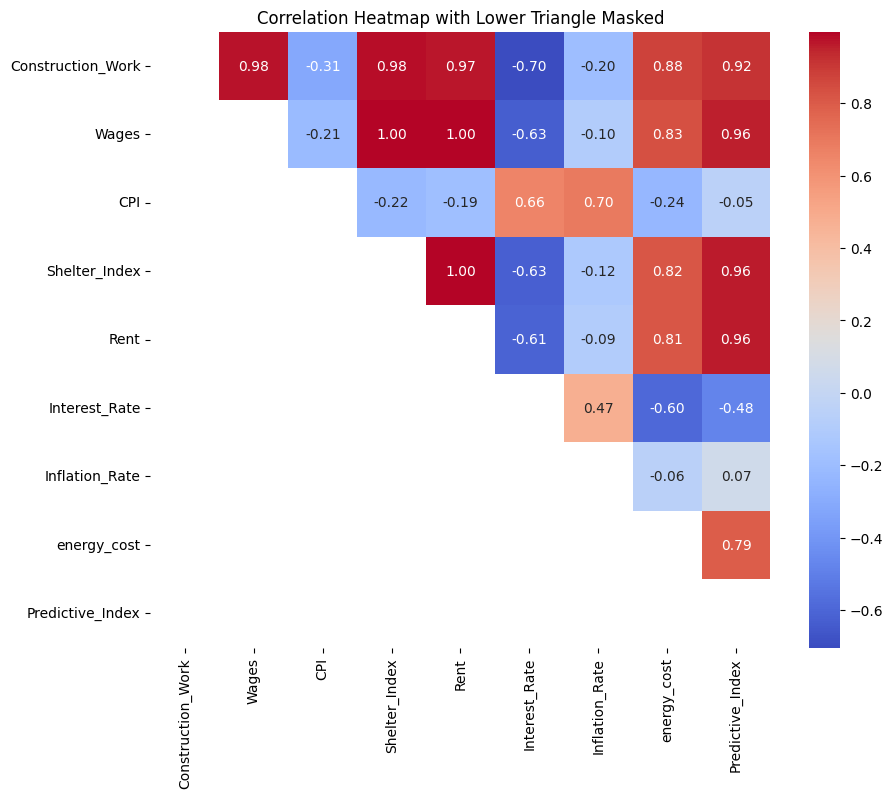

In [ ]:

# Plot the heatmap
mask = np.tril(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap with mask
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask, fmt=".2f")
plt.title('Correlation Heatmap with Lower Triangle Masked')
plt.show()

In [36]:
df.head()

,Date,Construction_Work,Wages,CPI,Shelter_Index,Rent,Interest_Rate,Inflation_Rate,energy_cost,Predictive_Index
0,1987-01-01,41.501490,9.02,4.492110,118.6,121.2,6.43,4.90,0.862,63.965
1,1987-01-02,41.663210,9.05,4.451732,119.1,121.6,6.10,3.37,0.905,64.423
2,1987-01-03,41.723855,9.07,4.276018,119.5,122.0,6.13,3.99,0.912,64.735
3,1987-01-04,41.784500,9.08,4.371204,120.3,122.2,6.37,5.01,0.934,65.131
4,1987-01-05,42.128156,9.11,4.429512,120.7,122.5,6.85,3.34,0.941,65.563


Feature Selection

In [38]:
skewness = df.drop('Date', axis=1).skew()

# Remove features with high skewness
high_skewness_features = skewness[abs(skewness) > 1].index
#df_no_skewness = df.drop(high_skewness_features, axis=1)

print(high_skewness_features)

Index(['Inflation_Rate'], dtype='object')


In [39]:
df_no_skewness = df.drop(high_skewness_features, axis=1)

In [ ]:
high_corr_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)
print(high_corr_features)

{'energy_cost', 'Rent', 'Interest_Rate', 'Shelter_Index', 'Wages', 'Predictive_Index'}


In [40]:
df.columns

Index(['Date', 'Construction_Work', 'Wages', 'CPI', 'Shelter_Index', 'Rent',
       'Interest_Rate', 'Inflation_Rate', 'energy_cost', 'Predictive_Index'],
      dtype='object')

Principal component analysis for dimensionality reduction to remove multicollinearity

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
features = ['energy_cost', 'Rent', 'Interest_Rate', 'Shelter_Index', 'Wages']
df_features = df[features]

# Standardize the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_features)

# Apply PCA
pca = PCA(n_components=2)  # Choose the number of principal components you want
df_pca = pca.fit_transform(df_standardized)

# Create a DataFrame with PCA results
df_pca_df = pd.DataFrame(df_pca, columns=['Principal Component 1', 'Principal Component 2'])

print("PCA Results:")
print(df_pca_df)

# Print the explained variance ratio
print("\nExplained variance ratio of each principal component:")
print(pca.explained_variance_ratio_)

PCA Results:
     Principal Component 1  Principal Component 2
0                -3.120047               0.091121
1                -3.048090              -0.016690
2                -3.042022              -0.002613
3                -3.056943               0.085908
4                -3.111162               0.256646
..                     ...                    ...
443               3.571550               2.300463
444               3.579290               2.311760
445               3.668935               2.335082
446               3.796690               2.365114
447               3.905753               2.390194

[448 rows x 2 columns]

Explained variance ratio of each principal component:
[0.84189068 0.10576977]


In [43]:
df_remaining = df.drop(columns=features)
df_combined = pd.concat([df_remaining, df_pca_df], axis=1)

print("Combined DataFrame:")
print(df_combined)

Combined DataFrame:
          Date  Construction_Work       CPI  Inflation_Rate  Predictive_Index  \
0   1987-01-01          41.501490  4.492110            4.90            63.965   
1   1987-01-02          41.663210  4.451732            3.37            64.423   
2   1987-01-03          41.723855  4.276018            3.99            64.735   
3   1987-01-04          41.784500  4.371204            5.01            65.131   
4   1987-01-05          42.128156  4.429512            3.34            65.563   
..         ...                ...       ...             ...               ...   
443 2023-01-12         123.786500  4.554396            1.84           314.443   
444 2024-01-01         122.779800  4.603922            5.57           315.728   
445 2024-01-02         122.906700  4.403102            3.21           317.257   
446 2024-01-03         123.560900  4.509212            3.27           318.217   
447 2024-01-04         122.700900  4.412395            2.73           319.048   

     Pr

Trainig the model

In [44]:
X = df.drop(columns=['Date', 'Predictive_Index'])
y = df['Predictive_Index']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [48]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 135.00939782231873
R-squared: 0.9753778722278162


In [49]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 11.619354449465716


In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
model = RandomForestRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best MSE: ", -grid_search.best_score_)

# Use the best model to predict and evaluate
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test MSE with best model: ", mse)

Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best MSE:  2.554823966814422
Test MSE with best model:  1.0413838797891717


In [51]:
from sklearn.metrics import r2_score, mean_absolute_error

# Calculate additional metrics
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Root Mean Squared Error: 1.0204821800448902
Mean Absolute Error: 0.6428237222222332
R-squared: 0.9998100792436553


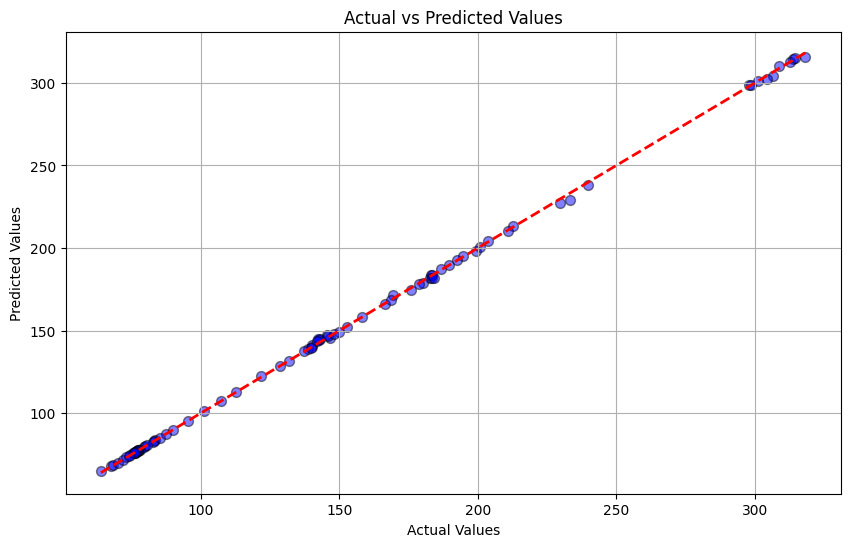

In [53]:

import matplotlib.pyplot as plt

# Predict on the test set
y_pred = best_model.predict(X_test)

# Create a scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', edgecolor='k', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()